<a href="https://colab.research.google.com/github/Vkgoud1523/Blockchain-FAQ-s-V1/blob/main/FrequencyAnalysis_of_smartcontract_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Frequency Analysis of Smart Contract Risks**


Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# Ensure plots are displayed inline in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


 **Load the Data Section**

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library


In [4]:
# Loading the dataset

df = pd.read_excel('compiled_risk_data.xlsx - Data Analytics.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


## Calculate Correlation

To calculate the Phi coefficient, which is suitable for pairs of binary variables, we first need to establish a function that can handle this calculation:

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

**Frequency Analysis**

In [7]:
df[['exploitation','hidden_owner']].value_counts()

exploitation  hidden_owner
False         False           464
True          False           353
              True             84
False         True             66
Name: count, dtype: int64

Let's now define the risk columns of our dataset.

In [8]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [9]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-10-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


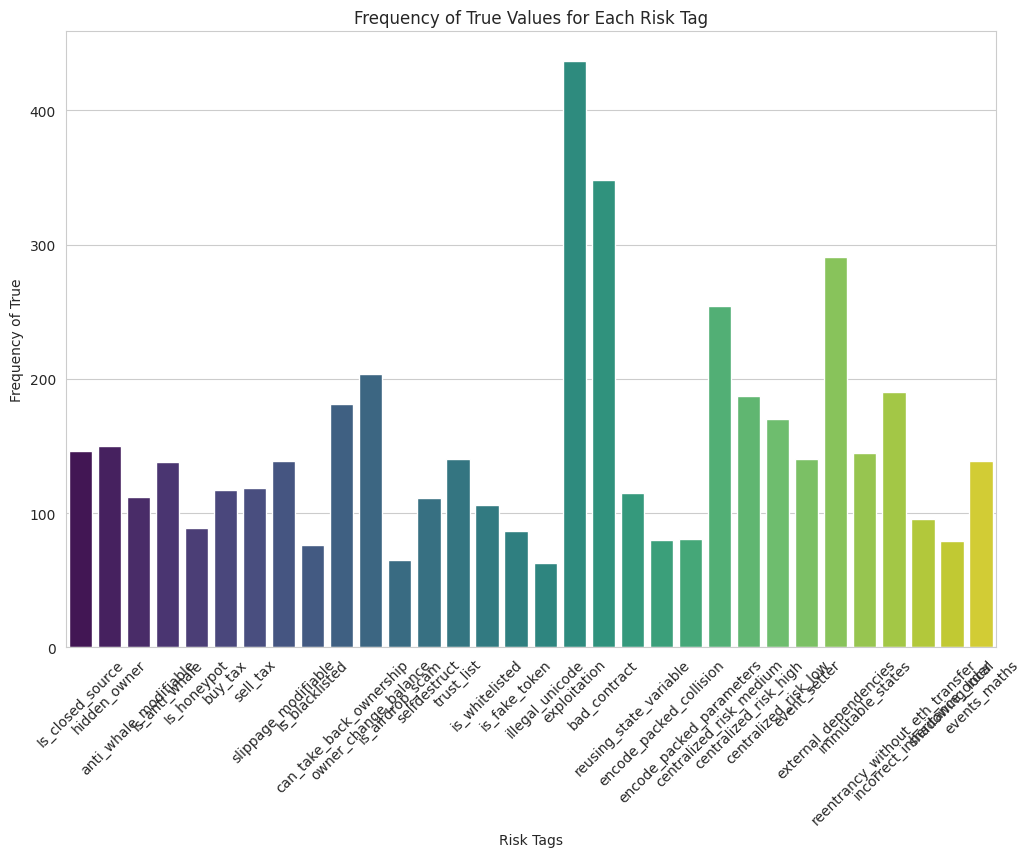

In [10]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()